# Import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read Data

In [2]:
# train=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
# test=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")
# train.head()

In [3]:
train=pd.read_csv("../MLP/Data/train.csv")
test=pd.read_csv("../MLP/Data/test.csv")
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [4]:
print(train.shape)
print(test.shape)

(175000, 17)
(50000, 16)


# Extended data View

In [5]:
# train
for col in train.columns:
    print(train[col].value_counts())

VendorID
1    127340
0     47597
2        63
Name: count, dtype: int64
tpep_pickup_datetime
2023-06-28 18:11:16    8
2023-06-28 19:27:11    8
2023-06-28 18:42:04    8
2023-06-29 16:29:15    8
2023-06-30 10:10:19    8
                      ..
2023-06-29 22:20:13    1
2023-06-30 09:33:42    1
2023-06-28 19:26:26    1
2023-06-29 05:51:13    1
2023-06-30 21:26:43    1
Name: count, Length: 109877, dtype: int64
tpep_dropoff_datetime
2023-06-29 19:08:22    10
2023-06-28 18:36:02     8
2023-06-29 18:45:50     8
2023-06-29 18:04:14     8
2023-06-29 12:28:20     8
                       ..
2023-06-29 14:52:05     1
2023-06-30 13:57:09     1
2023-06-28 17:13:46     1
2023-06-29 12:28:23     1
2023-06-30 22:54:42     1
Name: count, Length: 109713, dtype: int64
passenger_count
1.0    128534
2.0     24316
3.0      6018
4.0      3668
0.0      2818
5.0      1970
6.0      1596
8.0         2
9.0         1
Name: count, dtype: int64
trip_distance
0.00     2632
1.00     2431
0.90     2383
1.20     2363
1.1

## Highlights

1. passenger_count: Maximum people are travelling alone
2. trip_distance: There are very few long drive
3. payment_type: Most of customers are using credit cards followed by cash
4. tolls_amount: Most of rides are of short distance, which implies no tolls

In [6]:
# test
for col in test.columns:
    print(test[col].value_counts())

VendorID
1    36480
0    13503
2       17
Name: count, dtype: int64


tpep_pickup_datetime
2023-06-29 20:59:17    6
2023-06-28 20:54:59    5
2023-06-28 21:21:38    5
2023-06-29 20:52:21    4
2023-06-29 16:16:57    4
                      ..
2023-06-29 23:22:46    1
2023-06-28 20:00:11    1
2023-06-29 20:26:54    1
2023-06-29 22:46:01    1
2023-06-30 18:05:15    1
Name: count, Length: 43216, dtype: int64
tpep_dropoff_datetime
2023-06-29 22:46:33    5
2023-06-29 20:14:44    5
2023-06-28 18:21:02    4
2023-06-30 15:45:51    4
2023-06-28 18:39:22    4
                      ..
2023-06-28 21:41:59    1
2023-06-30 07:19:45    1
2023-06-30 01:18:05    1
2023-06-30 08:30:58    1
2023-06-30 17:15:16    1
Name: count, Length: 43205, dtype: int64
passenger_count
1.0    36532
2.0     7155
3.0     1731
4.0     1062
0.0      781
5.0      546
6.0      413
8.0        1
Name: count, dtype: int64
trip_distance
0.00     742
1.00     734
0.90     669
0.80     651
1.10     622
        ... 
23.46      1
25.88      1
12.54      1
38.68      1
29.09      1
Name: count, Length: 2

# Data Cleaning


## Drop irrelevant Columns


In [7]:
len(train['PULocationID'].unique())

264

In [8]:
len(train['DOLocationID'].unique())

264

#### Droping PULocationID,DOLocationID

Since there is no Rate as per location (pickup), it is valid to drop the PU and DO location columns

In [9]:
# train
train.drop(['PULocationID','DOLocationID'],axis=1,inplace=True)
# test
test.drop(['PULocationID','DOLocationID'],axis=1,inplace=True)

## Cleaning Steps
Will go through data to achieve following:
1. Completeness
2. Validity
3. Accuracy
4. Consistency

### Completeness

#### Null Values

In [10]:
# train
train.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [11]:
# train
train.fillna({'RatecodeID':5.0,'store_and_fwd_flag':train['store_and_fwd_flag'].mode()[0],'passenger_count':train['passenger_count'].mean(),'congestion_surcharge':train['congestion_surcharge'].mean(),'Airport_fee':train['Airport_fee'].mean()},inplace=True)

In [12]:
# test
test.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
dtype: int64

In [13]:
# test
test.fillna({'RatecodeID':train['RatecodeID'].mode()[0],'store_and_fwd_flag':train['store_and_fwd_flag'].mode()[0],'passenger_count':train['passenger_count'].mean(),'congestion_surcharge':train['congestion_surcharge'].mean(),'Airport_fee':train['Airport_fee'].mean()},inplace=True)

### Validity

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        175000 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             175000 non-null  float64
 6   store_and_fwd_flag     175000 non-null  object 
 7   payment_type           175000 non-null  object 
 8   extra                  175000 non-null  float64
 9   tip_amount             175000 non-null  float64
 10  tolls_amount           175000 non-null  float64
 11  improvement_surcharge  175000 non-null  float64
 12  total_amount           175000 non-null  float64
 13  congestion_surcharge   175000 non-null  float64
 14  Airport_fee            175000 non-nu

In [15]:
train.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee'],
      dtype='object')

#### Absolute Values of non-negative columns

In [16]:
# train
train[train.drop(['tpep_dropoff_datetime', 'store_and_fwd_flag','tpep_pickup_datetime','payment_type'],axis=1).columns]=train.drop(['tpep_dropoff_datetime', 'store_and_fwd_flag','tpep_pickup_datetime','payment_type'],axis=1).abs()

In [17]:
# test
test[test.drop(['tpep_dropoff_datetime', 'store_and_fwd_flag','tpep_pickup_datetime','payment_type'],axis=1).columns]=test.drop(['tpep_dropoff_datetime', 'store_and_fwd_flag','tpep_pickup_datetime','payment_type'],axis=1).abs()

### Accuracy

#### Pickup and dropoff dates

In [18]:
#train
train['tpep_pickup_datetime']=pd.to_datetime(train['tpep_pickup_datetime'])

In [19]:
#test
test['tpep_pickup_datetime']=pd.to_datetime(test['tpep_pickup_datetime'])

#### RatecodeID

In [20]:
# ratecodeid
train['RatecodeID'].value_counts()

RatecodeID
1.0     158652
2.0       7314
5.0       7113
99.0       748
3.0        727
4.0        446
Name: count, dtype: int64

In [21]:
# ratecodeid
train.loc[train['RatecodeID']==99,'RatecodeID']=5.0

Since RatecodeID=99 is highest RatecodeID,so this may not be a acurately input

#### Outlier

In [22]:
train.drop('tpep_pickup_datetime',axis=1).describe()

,VendorID,passenger_count,trip_distance,RatecodeID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000
mean,0.728377,1.357678,5.145930,1.237429,1.959172,6.127497,0.657496,0.999403,30.185621,2.286571,0.164005
std,0.445606,0.875671,394.971052,0.862381,1.921318,4.610834,2.325280,0.022244,24.767667,0.684311,0.501335
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000079,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.080000,1.000000,0.000000,3.473321,0.000000,1.000000,16.320000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,1.750000,5.286217,0.000000,1.000000,21.480000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,2.500000,7.502746,0.000000,1.000000,31.920000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,5.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


Highlights
1. tip_amount,tolls_amount,total_amount seems to have outlier
2. ignoring passenger_count,extra, since these can be possible values for short ride also

##### Looking at individual columns outlier

In [23]:
cols_plot=['passenger_count','RatecodeID' ,'trip_distance', 'extra', 'tip_amount', 'tolls_amount','improvement_surcharge', 'total_amount', 'congestion_surcharge','Airport_fee']

In [24]:
train.melt(value_vars=cols_plot)

,variable,value
0,passenger_count,1.00
1,passenger_count,1.00
2,passenger_count,1.00
3,passenger_count,1.00
4,passenger_count,3.00
...,...,...
1749995,Airport_fee,0.00
1749996,Airport_fee,1.75
1749997,Airport_fee,0.00
1749998,Airport_fee,0.00


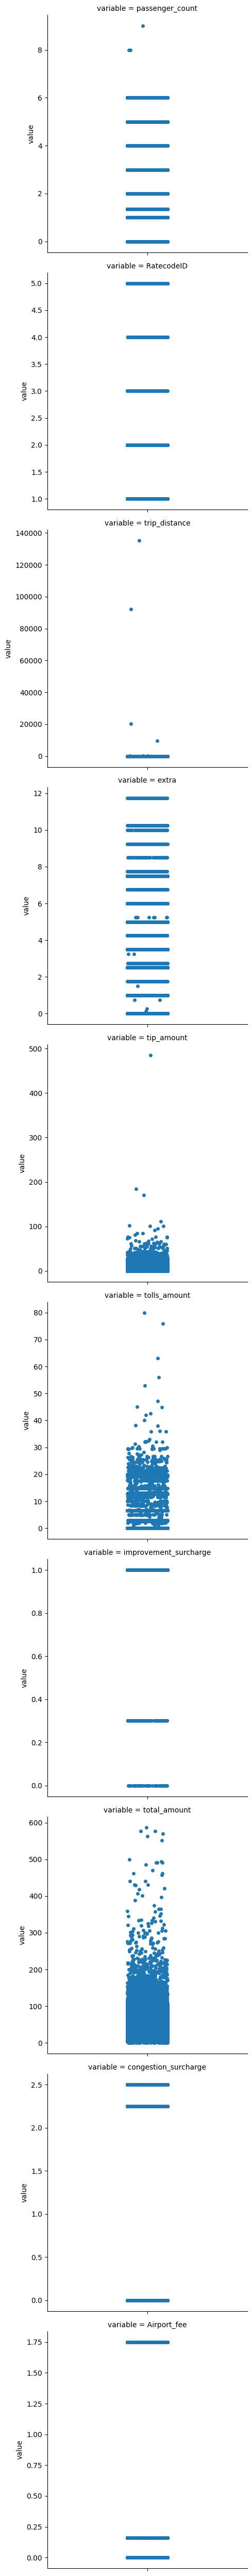

In [25]:
# w/o store_and_fwd_flag
sns.catplot(kind='strip',data=train.melt(value_vars=cols_plot),y='value',row='variable',sharey=False)

###### trip_distance

In [26]:
# after seeing box plot
train[train['trip_distance']>9]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
23,1,2023-06-29 20:00:15,2023-06-29 19:17:47,1.0,9.05,1.0,N,Credit Card,5.00,13.880001,6.55,1.0,67.21,0.0,1.75
26,0,2023-06-28 17:49:42,2023-06-28 17:49:34,1.0,17.80,1.0,N,Credit Card,9.25,20.794591,0.00,1.0,95.45,0.0,1.75
27,1,2023-06-29 17:43:29,2023-06-29 18:51:13,2.0,33.95,3.0,N,Cash,2.50,3.177106,29.00,1.0,194.80,0.0,0.00
36,1,2023-06-29 14:02:44,2023-06-29 13:48:37,1.0,18.19,2.0,N,Credit Card,0.00,19.170554,6.55,1.0,98.76,2.5,1.75
42,1,2023-06-29 18:40:09,2023-06-29 20:11:13,1.0,17.33,2.0,N,Credit Card,5.00,4.347383,6.55,1.0,85.55,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174953,0,2023-06-28 18:53:54,2023-06-28 18:48:24,3.0,10.80,1.0,N,Credit Card,11.75,16.639958,6.55,1.0,76.05,2.5,1.75
174961,0,2023-06-29 22:06:33,2023-06-29 21:09:34,1.0,12.10,1.0,N,Cash,3.50,1.122943,6.55,1.0,64.95,2.5,0.00
174967,1,2023-06-29 19:57:56,2023-06-29 20:06:53,1.0,9.26,1.0,N,Credit Card,6.00,19.220866,6.55,1.0,78.25,2.5,1.75
174981,1,2023-06-29 21:09:44,2023-06-29 22:45:10,1.0,17.10,2.0,N,Cash,0.00,4.632879,6.55,1.0,82.30,2.5,1.75


In [27]:
test[test['trip_distance']>100]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
15870,1,2023-06-30 18:19:24,2023-06-30 19:54:59,1.357678,17624.43,1.0,N,Wallet,0.0,6.040512,0.00,1.0,2.246971,0.158825
21281,1,2023-06-30 13:39:17,2023-06-30 17:47:24,2.000000,131.78,5.0,N,Cash,0.0,1.863487,0.00,1.0,0.000000,1.750000
22293,1,2023-06-30 16:17:42,2023-06-30 21:04:53,1.000000,135.61,4.0,N,Cash,2.5,1.058615,6.55,1.0,0.000000,1.750000
38528,1,2023-06-29 15:48:17,2023-06-29 20:43:54,2.000000,141.39,4.0,N,Cash,2.5,2.927007,41.75,1.0,0.000000,1.750000
43973,1,2023-06-29 10:58:09,2023-06-29 16:51:56,3.000000,182.45,5.0,N,Cash,0.0,3.720836,47.75,1.0,2.500000,0.000000


In [28]:
#trip_distance after 100km are outlier and looking at the total total amount does not make sense
train.drop(train[train['trip_distance']>100].index,inplace=True)

In [29]:
# #trip_distance after 150km are outlier and looking at the total total amount does not make sense
# test.drop(test[test['trip_distance']>100].index,inplace=True)

###### tip_amount

<Axes: xlabel='tip_amount', ylabel='total_amount'>

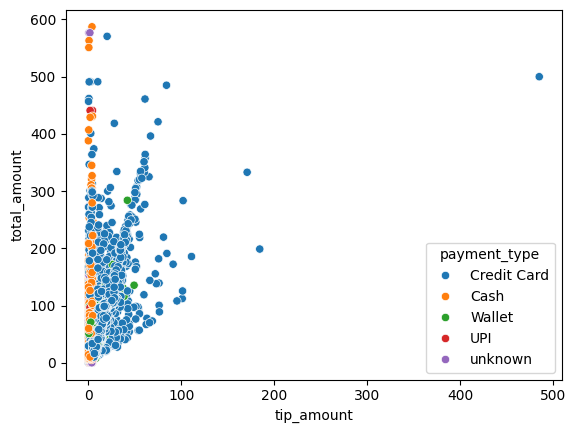

In [30]:
sns.scatterplot(data=train,x='tip_amount',y='total_amount',hue='payment_type')

In [31]:
#train
train.drop(train[train['tip_amount']>120].index,inplace=True)

In [32]:
# # test
# test.drop(test[test['tip_amount']>150].index,inplace=True)

###### Pairplot

In [33]:
train.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee'],
      dtype='object')

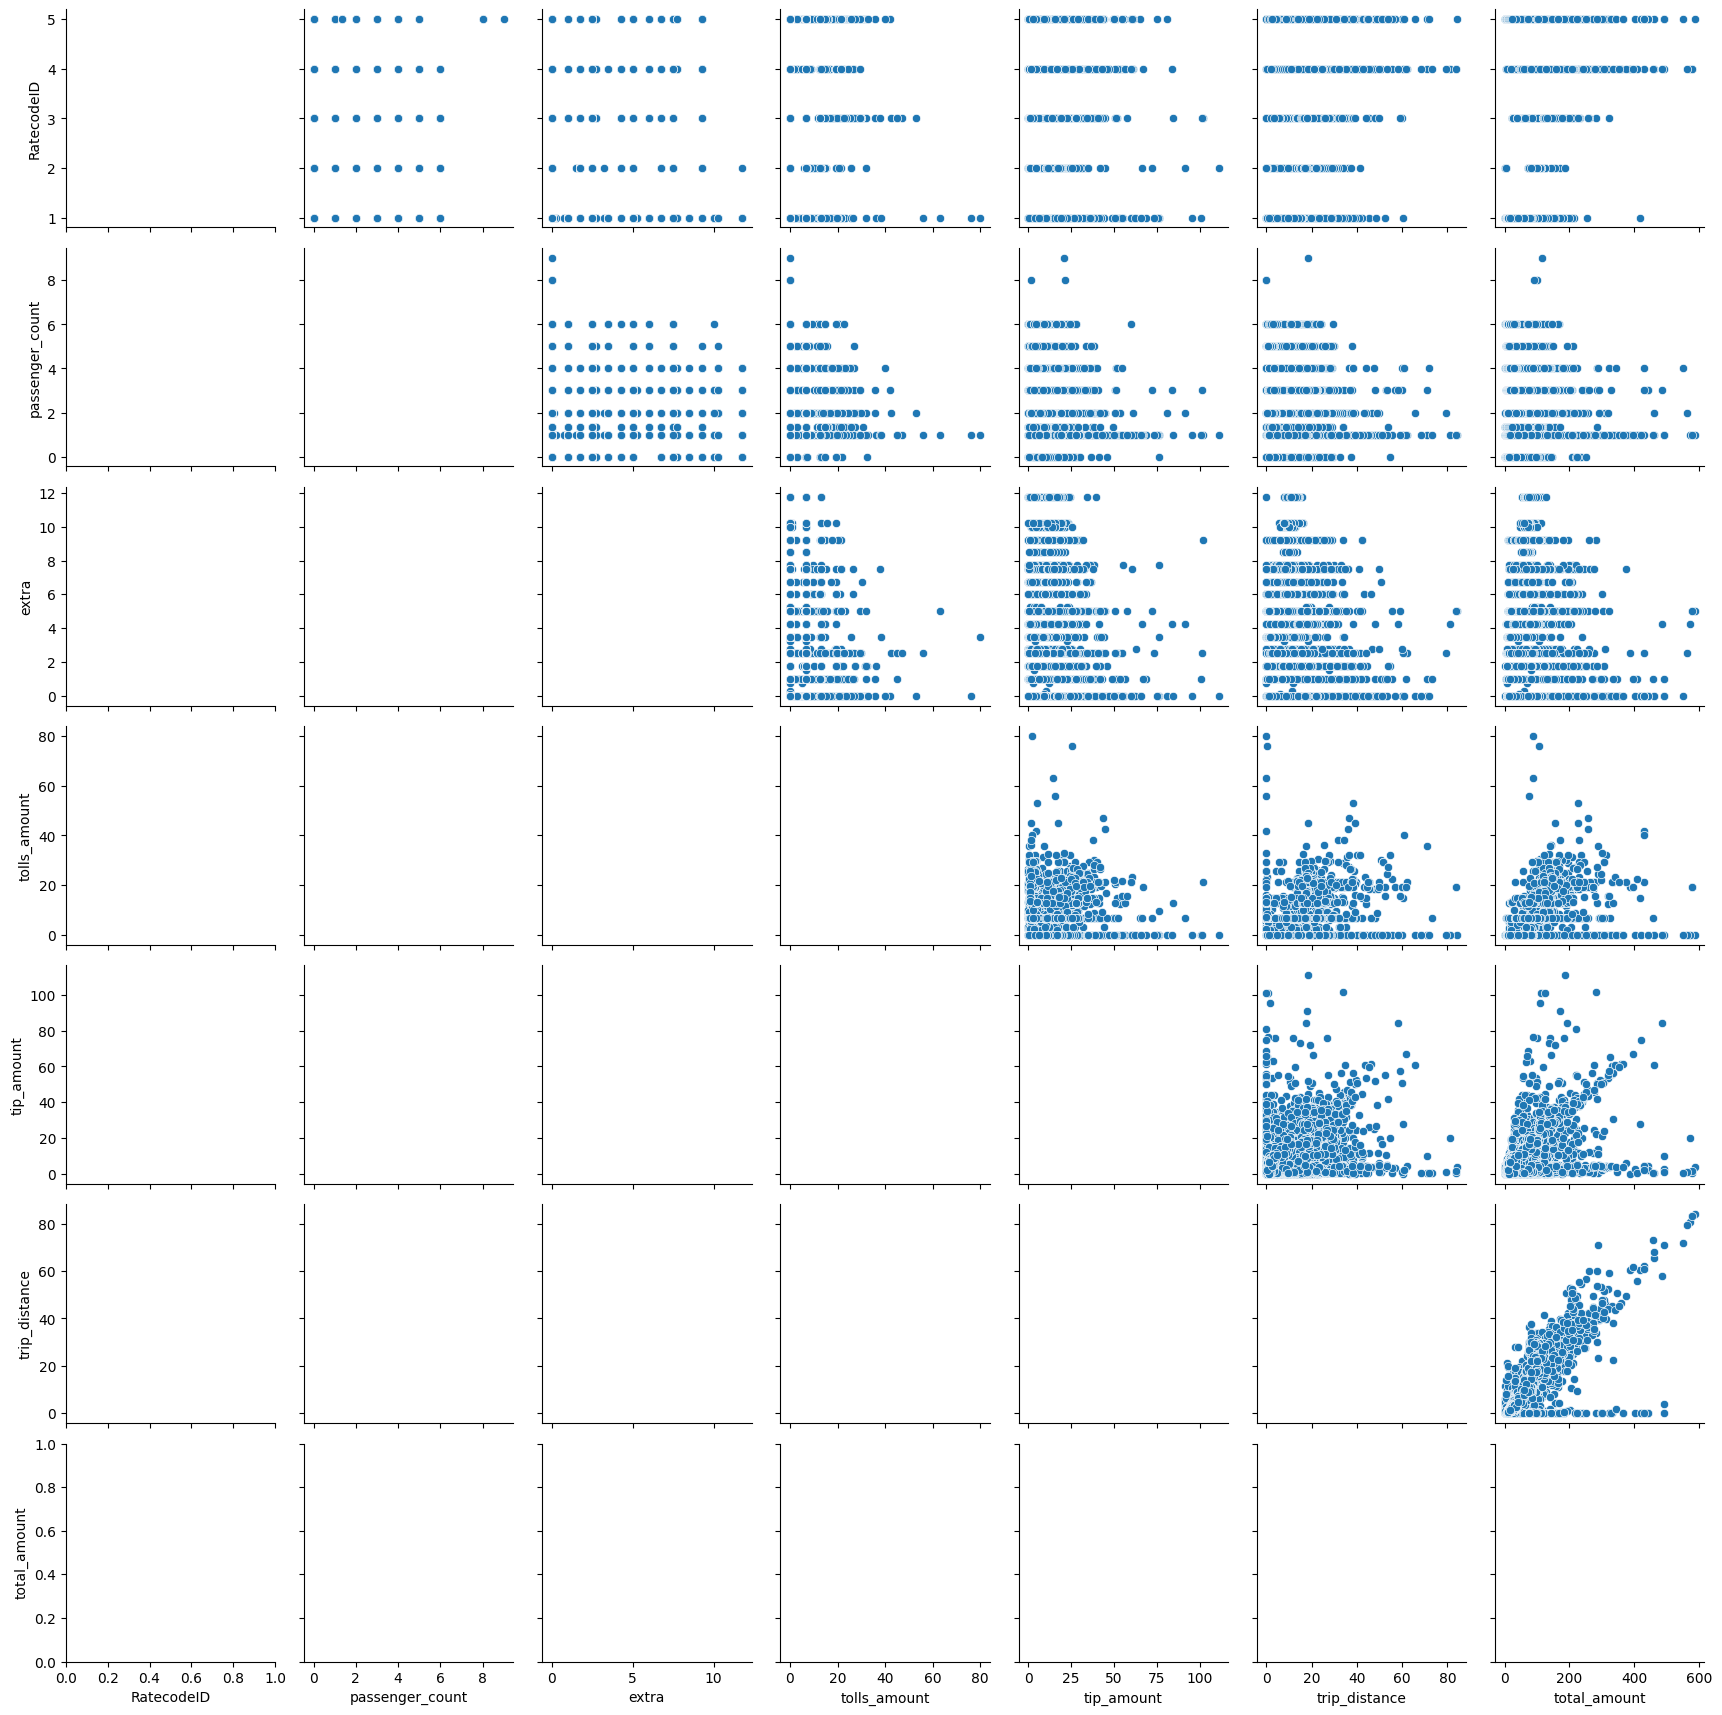

In [34]:
pg=sns.PairGrid(data=train,vars=['RatecodeID','passenger_count','extra','tolls_amount','tip_amount','trip_distance','total_amount'])
pg.map_upper(sns.scatterplot)

###### tolls_amount

In [35]:
# train
train.drop(train[train['tolls_amount']>50].index,inplace=True)

In [36]:
# # test
# test.drop(test[test['tolls_amount']>50].index,inplace=True)

### Consistency

No Consistency Problem

# Feature Engineering

### Pickup date

In [37]:
# train date,day,month,hour
train['date']=train['tpep_pickup_datetime'].dt.day
train['day']=train['tpep_pickup_datetime'].dt.dayofweek
train['month']=train['tpep_pickup_datetime'].dt.month
train['hour']=train['tpep_pickup_datetime'].dt.hour

In [38]:
# test date,day,month,hour
test['date']=test['tpep_pickup_datetime'].dt.day
test['day']=test['tpep_pickup_datetime'].dt.dayofweek
test['month']=test['tpep_pickup_datetime'].dt.month
test['hour']=test['tpep_pickup_datetime'].dt.hour

#### pickup hours+min to sin function

In [39]:
# train
train['sine_pickup_hour']=np.sin(((train['tpep_pickup_datetime'].dt.hour*60+train['tpep_pickup_datetime'].dt.minute)/60)*2*np.pi)

In [40]:
# test
test['sine_pickup_hour']=np.sin(((test['tpep_pickup_datetime'].dt.hour*60+test['tpep_pickup_datetime'].dt.minute)/60)*2*np.pi)

OneHotEncoding done after EDA

# EDA

Mean of total_amount vs hour on each day

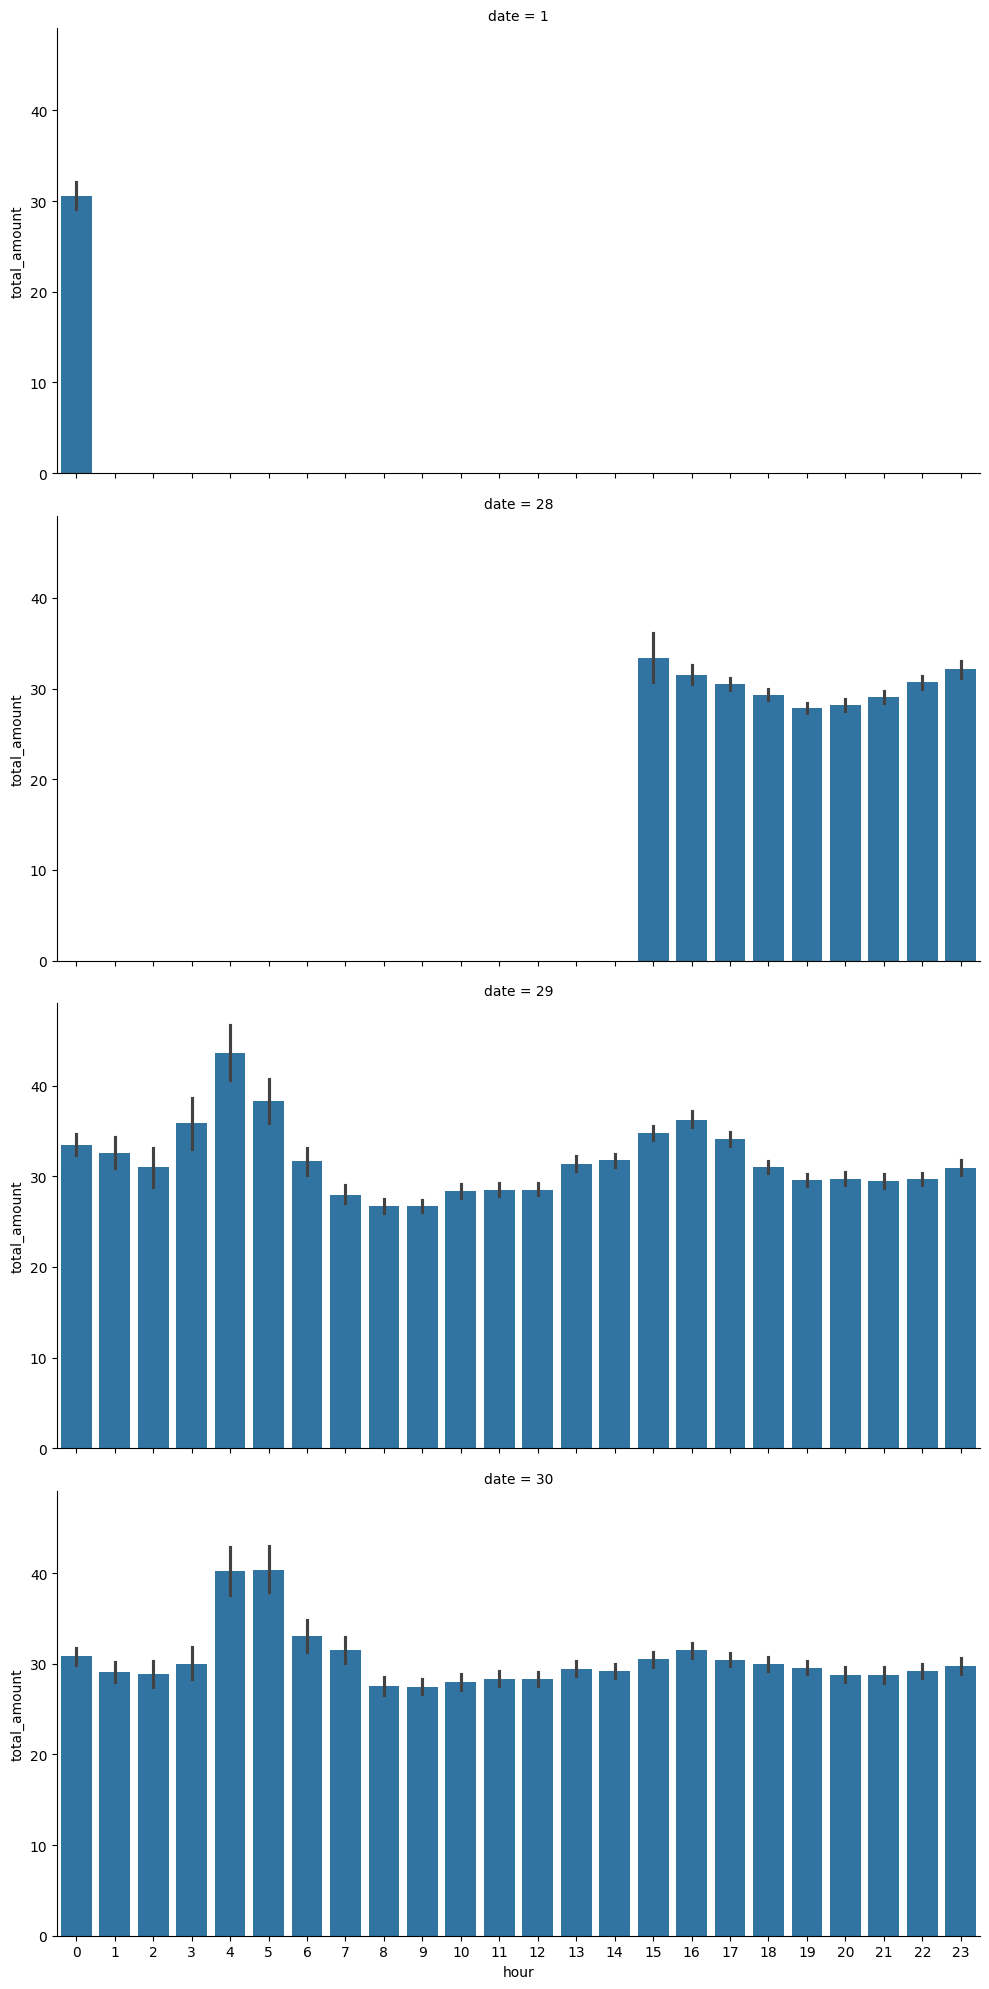

In [41]:
sns.catplot(train,kind='bar',x='hour',y='total_amount',estimator=np.mean,row='date',aspect=2)
plt.xticks(np.unique(train.hour))
plt.show()

Highlights

1. Data is not present for whole on 28th
2. Higher total_amount are taken at 04:00-05:00 hour in the morning, may be because long drive trips starts early
3. At evening,peak can be seen at 16:00 hour

### VendorID and payment_type

In [42]:
# Does it affect total amount if you take taxi from different vendor
pd.pivot_table(data=train,index='VendorID',values='total_amount',aggfunc=('describe'))

,25%,50%,75%,count,max,mean,min,std
VendorID,,,,,,,,
0,15.795,20.60,29.50,47591.0,570.55,27.974398,0.00,22.297856
1,16.500,21.90,33.00,127331.0,587.25,30.983203,0.00,25.441725
2,33.265,45.84,58.93,63.0,104.18,47.500317,12.03,20.608815


Highlights

1. Rides by VendorID 2, have higher prices as compare to 0 and 1
2. Vendor with ID 1, take largest market share amoung three.
3. Vendor with ID 2, offer more short rides

In [43]:
# Does it affect total amount if you take taxi from using different payment_type
pd.pivot_table(data=train,index='payment_type',values='total_amount',aggfunc=('describe'))

,25%,50%,75%,count,max,mean,min,std
payment_type,,,,,,,,
Cash,13.60,18.20,28.125,30138.0,587.25,26.658233,0.0,23.916931
Credit Card,17.00,22.20,32.200,135248.0,570.55,30.795781,0.0,24.678363
UPI,8.40,13.21,22.475,1192.0,441.00,22.815277,0.0,28.647459
Wallet,20.69,29.21,43.180,6074.0,283.99,35.814893,0.0,22.262201
unknown,12.20,17.80,31.550,2333.0,576.75,28.382027,0.0,30.392186


Highlights

1. A user with wallet on average pay higher compare to other 

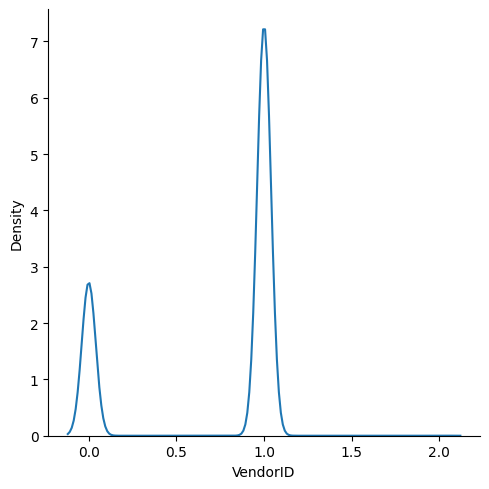

In [44]:
sns.displot(kind='kde',data=train,x='VendorID')

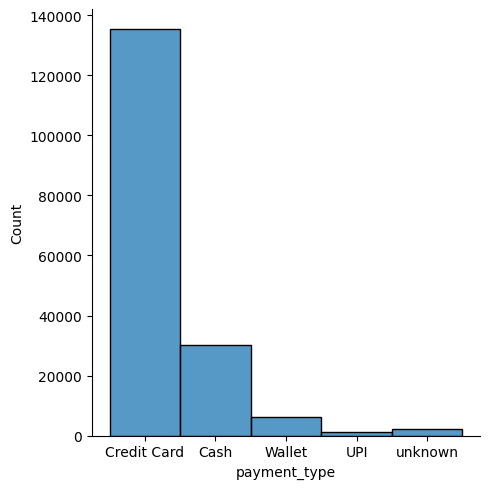

In [45]:
sns.displot(kind='hist',data=train,x='payment_type')

Highlights

1. Most of the taxi-taker in this city use credit card very often
2. Seem UPI new to town, very less people are aware about it.

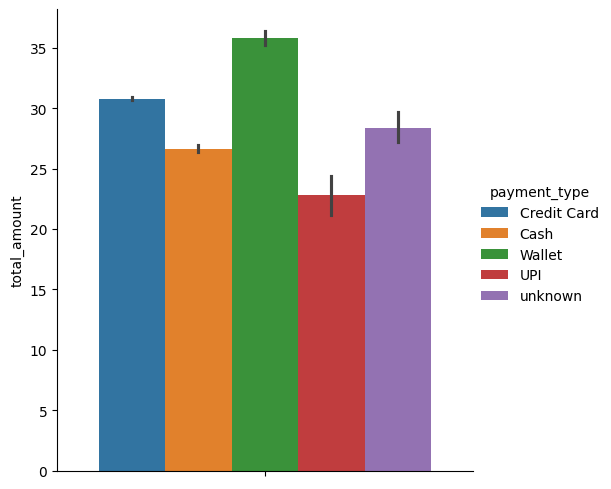

In [46]:
# Times when total amount paid using different payment_type
sns.catplot(kind='bar',data=train,y='total_amount',hue='payment_type')

Highlights
1. There are many credit card user, but graph show they are usually taking short rides
2. People are using wallet for paying higher amount
3. payment type unknown dominate over cash in paying higher amount using particular payment 

#### Correlation

<Axes: >

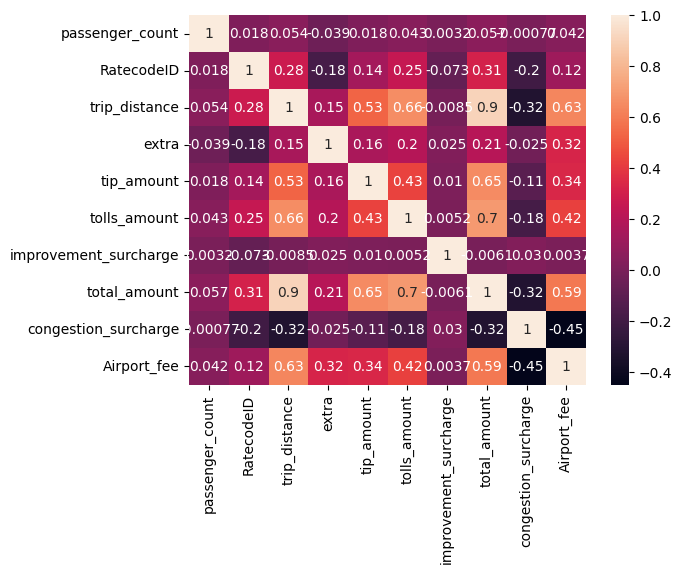

In [47]:
sns.heatmap(train.loc[:,cols_plot].corr(),annot=True)

##### Highlights
1. passenger_count, trip_distance, RatecodeID, extra, tip_amount, tolls_amount, improvement_surcharge, Airport_fee are `postively correlated` to total_amount 
2. congestion_surcharge is `negatively correlated` to total_amount
3. total_amount is `highly influenced` by trip_distance followed by tolls_amount and tip_amount

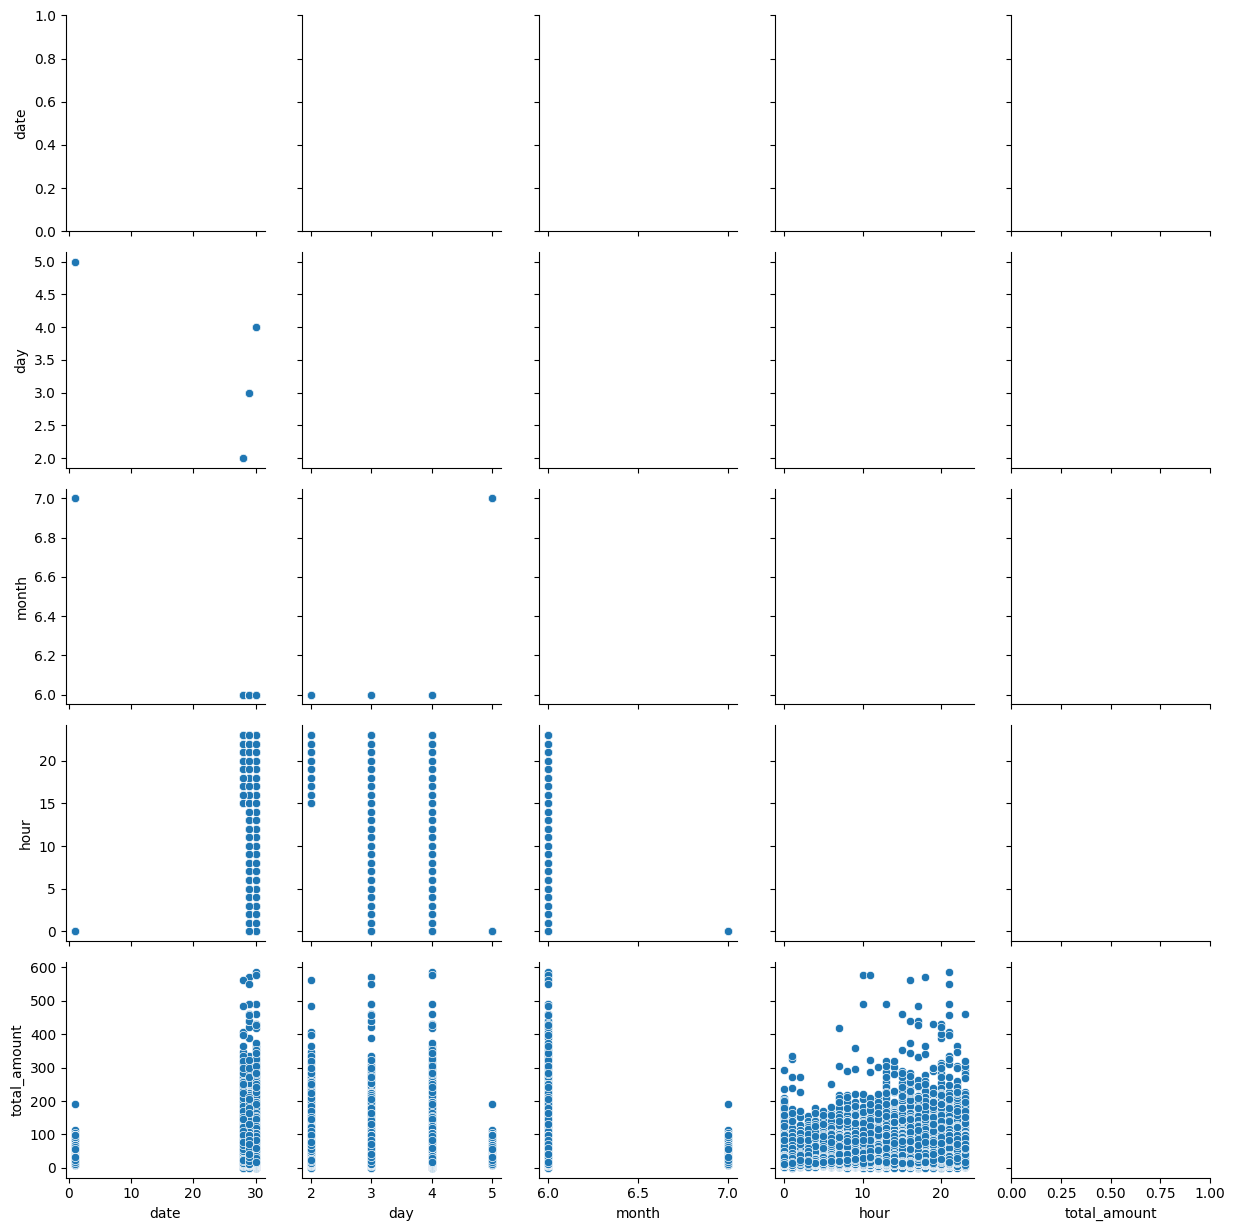

In [48]:
pg=sns.PairGrid(data=train,vars=['date','day','month','hour','total_amount'])
pg.map_lower(sns.scatterplot)

## Highlights

1. The following has only 4 days of data spread over 2 months
2. At night, there are more high amount rides as compare to morning

# Before Modelling

#### Dropping columns before model

['month','tpep_pickup_datetime','tpep_dropoff_datetime','date','hour','day']

In [49]:
#train
train.drop(columns=['month','tpep_pickup_datetime','tpep_dropoff_datetime','date','hour','day'],inplace=True)

In [50]:
#test
test.drop(columns=['month','tpep_pickup_datetime','tpep_dropoff_datetime','date','hour','day'],inplace=True)

## Train_test_split(Validation set)

In [60]:
X,y=train.drop('total_amount',axis=1),train['total_amount']

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## OneHotEncoder

In [52]:
# vendorID into object type
train['VendorID']=train['VendorID'].astype('object')
test['VendorID']=test['VendorID'].astype('object')

In [53]:
#train
# train=pd.get_dummies(train,columns=['VendorID','payment_type'],dtype=float)
cat_cols=['VendorID','store_and_fwd_flag','payment_type']
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
temp=ohe.fit_transform(X_train[cat_cols]).toarray()
data_wo_cat_cols=X_train.drop(columns=cat_cols).reset_index(drop=True)
ohe_data_frame=pd.DataFrame(temp,columns=ohe.get_feature_names_out()).reset_index(drop=True)
X_train=pd.concat([data_wo_cat_cols,ohe_data_frame],axis=1)

In [56]:
#X_test

temp=ohe.transform(X_test[cat_cols]).toarray()
data_wo_cat_cols=X_test.drop(columns=cat_cols).reset_index(drop=True)
ohe_data_frame=pd.DataFrame(temp,columns=ohe.get_feature_names_out()).reset_index(drop=True)
X_test=pd.concat([data_wo_cat_cols,ohe_data_frame],axis=1)

In [ ]:
#test
# test=pd.get_dummies(test,columns=['VendorID','payment_type'],dtype=float)

temp=ohe.transform(test[cat_cols]).toarray()
data_wo_cat_cols=test.drop(columns=cat_cols).reset_index(drop=True)
ohe_data_frame=pd.DataFrame(temp,columns=ohe.get_feature_names_out()).reset_index(drop=True)
test=pd.concat([data_wo_cat_cols,ohe_data_frame],axis=1)

# Model

In [58]:
train.columns

Index(['passenger_count', 'trip_distance', 'RatecodeID', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'sine_pickup_hour', 'VendorID_0',
       'VendorID_1', 'VendorID_2', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'payment_type_Cash', 'payment_type_Credit Card',
       'payment_type_UPI', 'payment_type_Wallet', 'payment_type_unknown'],
      dtype='object')

In [59]:
test.columns

Index(['passenger_count', 'trip_distance', 'RatecodeID', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'congestion_surcharge',
       'Airport_fee', 'sine_pickup_hour', 'VendorID_0', 'VendorID_1',
       'VendorID_2', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
       'payment_type_Cash', 'payment_type_Credit Card', 'payment_type_UPI',
       'payment_type_Wallet', 'payment_type_unknown'],
      dtype='object')

## Building baseline model
LinearRegression

In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8994794350144858

### Standard Scaler

In [63]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [64]:
lr.fit(X_train_ss,y_train)
lr.score(X_test_ss,y_test)

0.8994676679257969

### Polynomial regression with cross validation

In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

In [66]:
pipe=Pipeline([('polyfeatures',PolynomialFeatures()),('linearRegression',LinearRegression())])

In [67]:
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

-559942591002.5465

In [68]:
from sklearn.model_selection import cross_val_score
max(cross_val_score(estimator=pipe,X=X_train,y=y_train,cv=5))

0.9314654256028085

### Tune the hyperparameters of the model

In [69]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={'polyfeatures__degree':range(2,3)}
rscv_poly=RandomizedSearchCV(estimator=pipe,param_distributions=param_grid,cv=5)
rscv_poly.fit(X_train,y_train)
rscv_poly.score(X_test,y_test)

c:\Users\Linux\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


-559942591002.5465

## KNeighbors Regressor

In [70]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(X_train,y_train)
knr.score(X_test,y_test)

0.9334627697827739

## Validation Curve Knr

In [71]:
_range=range(1,20)
test_score=[]
train_score=[]
for i in _range:
    knr=KNeighborsRegressor(n_neighbors=i)
    knr.fit(X_train,y_train)
    train_score.append(knr.score(X_train,y_train))
    test_score.append(knr.score(X_test,y_test))
plt.plot(_range,test_score,label='Test Score')
plt.plot(_range,train_score,label='Train Score')
plt.legend(loc='best')

In [ ]:
test_score.index(max(test_score))+1

5

In [ ]:
test_score

[0.9008372728923081,
 0.9254695863276576,
 0.9282512434418628,
 0.9306760291553826,
 0.9310947740958164,
 0.9309717256311849,
 0.9301973313146348,
 0.9302416352356494,
 0.930530885880748,
 0.9302862384560754,
 0.9291392275238699,
 0.9300929351201692,
 0.9305585151432502,
 0.9307484121829275,
 0.9301793159361553,
 0.9295698211765832,
 0.9288454785892034,
 0.9283297972360643,
 0.9279305133709861]

## Grid Search Knr

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':_range}
gscv_knr=GridSearchCV(knr,param_grid=param_grid,cv=10)
gscv_knr.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(n_neighbors=19),
             param_grid={'n_neighbors': range(1, 20)})

In [ ]:
print(gscv_knr.best_score_)
print(gscv_knr.best_params_)

0.9300458339213582
{'n_neighbors': 11}


## SVM (SVR)

In [ ]:
# from sklearn.svm import SVR
# svr=SVR()
# svr.fit(X_train,y_train)
# svr.score(X_test,y_test)
# # 0.8517960967105407

0.8517960967105407

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr.score(X_test,y_test)

0.8968278465918644

In [ ]:
dtr.tree_.max_depth

45

In [ ]:
param_grid={'max_depth':range(1,45),'min_samples_split':range(2,6),'min_samples_leaf':range(1,5)}
gscv_dtr=GridSearchCV(dtr,param_grid=param_grid)
gscv_dtr.fit(X_train,y_train)
gscv_dtr.score(X_test,y_test)

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(X_train,y_train)
abr.score(X_test,y_test)

## MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor
mlpr=MLPRegressor()
mlpr.fit(X_train,y_train)
mlpr.score(X_test,y_test)

# Hit the Block

I tried the above models on test datset and submitted but that results in negative R2_score value of -101.
So now i am trying with minimum features and keep adding feature to see if the score increase.

# After Block (New Start after insight from data)

In this attempt, we start with base estimator consider only numerical feature, then add or remove features based to test score

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [2]:
train=pd.read_csv("../MLP/Data/train.csv")
test=pd.read_csv("../MLP/Data/test.csv")
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [3]:
# train=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
# test=pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")
# train.head()

In [4]:
train.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')

## Feature Engineering

OneHotEncoding and tring adding categorical columns to see the increase in score

In [5]:
# # score reduced using following columns=['store_and_fwd_flag','payment_type','VendorID']
# train=pd.get_dummies(train,columns=['store_and_fwd_flag'])
# test=pd.get_dummies(test,columns=['store_and_fwd_flag'])

## Drop columns

Dropping columns based on its effect on test dataset

In [6]:
train.drop(columns=['VendorID',  'tpep_pickup_datetime','tpep_dropoff_datetime','RatecodeID','PULocationID', 'DOLocationID','payment_type','congestion_surcharge','store_and_fwd_flag'],inplace=True)
test.drop(columns=['VendorID',  'tpep_pickup_datetime','tpep_dropoff_datetime','RatecodeID','PULocationID', 'DOLocationID','payment_type','congestion_surcharge','store_and_fwd_flag'],inplace=True)
# 'Airport_fee','improvement_surcharge', 'store_and_fwd_flag','tpep_pickup_datetime',

In [7]:
train.columns

Index(['passenger_count', 'trip_distance', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'Airport_fee'],
      dtype='object')

In [8]:
# test
test.fillna({'passenger_count':-1,'Airport_fee':-1},inplace=True)

## Data Cleaning

From past data insight

In [9]:
## change Numerical features  to +ve
# train=train.abs()
# test=test.abs()
# # 0.81264 V28

In [10]:
train.drop(train[train['trip_distance']>100].index,inplace=True)
train.drop(train[train['tolls_amount']>50].index,inplace=True)
train.drop(train[train['tip_amount']>120].index,inplace=True)

In [11]:
train.dropna(inplace=True)
train.reset_index(drop=True,inplace=True)

In [12]:
train.isnull().sum()

passenger_count          0
trip_distance            0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
Airport_fee              0
dtype: int64

In [13]:
test.isnull().sum()

passenger_count          0
trip_distance            0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
Airport_fee              0
dtype: int64

## Train_test_split

In [14]:
X=train.select_dtypes(include=np.number)
test=test.select_dtypes(include=np.number)

In [15]:
X,y=X.drop('total_amount',axis=1),X['total_amount']

In [16]:
X

,passenger_count,trip_distance,extra,tip_amount,tolls_amount,improvement_surcharge,Airport_fee
0,1.0,2.14,2.5,7.165589,0.0,1.0,0.00
1,1.0,2.70,3.5,6.067401,0.0,1.0,0.00
2,1.0,1.15,0.0,4.111547,0.0,1.0,0.00
3,1.0,0.40,2.5,6.411079,0.0,1.0,0.00
4,3.0,1.10,1.0,4.769377,0.0,1.0,0.00
...,...,...,...,...,...,...,...
168906,3.0,3.45,1.0,8.732495,0.0,1.0,0.00
168907,1.0,9.44,5.0,0.283275,0.0,1.0,1.75
168908,1.0,2.40,2.5,4.245354,0.0,1.0,0.00
168909,1.0,4.71,2.5,10.479776,0.0,1.0,0.00


In [17]:
y

0         20.64
1         25.55
2         17.64
3         12.80
4         18.00
          ...  
168906    28.08
168907    59.95
168908    33.50
168909    40.80
168910    16.32
Name: total_amount, Length: 168911, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Models

### BaseLine LinearRegression

In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8328706470905668

### LinearRegression with Standard Scaler 

In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)
lr.fit(X_train_ss,y_train)
lr.score(X_test_ss,y_test)

0.8328706470905678

### PipeLine: Polynomial Features, LinearRegression

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

pipe=Pipeline([('polyfeatures',PolynomialFeatures(degree=2)),('linearRegression',LinearRegression())])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8789908792731369

### KNeighborsRegressor

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(X_train,y_train)
knr.score(X_test,y_test)

0.8485484634275919

In [23]:
# y_pred=knr.predict(test)

#### Train test curve

In [24]:
# _range=range(1,20)
# test_score=[]
# train_score=[]
# for i in _range:
#     knr=KNeighborsRegressor(n_neighbors=i)
#     knr.fit(X_train,y_train)
#     train_score.append(knr.score(X_train,y_train))
#     test_score.append(knr.score(X_test,y_test))
# plt.plot(_range,test_score,label='Test Score')
# plt.plot(_range,train_score,label='Train Score')
# plt.legend(loc='best')

In [25]:
# test_score.index(max(test_score))+1

### SVM

In [26]:
# from sklearn.svm import SVR
# svr=SVR()
# svr.fit(X_train,y_train)
# svr.score(X_test,y_test)
# # 0.8517960967105407

### DecisionTree

In [27]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr.score(X_test,y_test)

0.8680253318244896

In [28]:
# param_grid={'max_depth':range(10,20),
#             'min_samples_split':range(10,12),
#             'min_samples_leaf':[1],
#             'splitter':['best', 'random']}
# gscv_dtr=GridSearchCV(dtr,param_grid=param_grid)
# gscv_dtr.fit(X_train,y_train)
# gscv_dtr.score(X_test,y_test)
# # 0.9074277643362958

In [29]:
# gscv_dtr.best_params_

### DecisionTree

In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
# rfr.fit(X_train,y_train)
# rfr.score(X_test,y_test)

In [31]:
# from xgboost import XGBRegressor
# xgb=XGBRegressor()
# xgb.fit(X_train,y_train)
# xgb.score(X_test,y_test)

In [32]:
# params = {
#     # Parameters that we are going to tune.
#     'max_depth':[7,8,9],
#     'n_estimators': [500,600,700],
#     'eta':[0.01,0.001],
#     'subsample': [0.8,0.9]
# }

In [33]:
# from sklearn.model_selection import GridSearchCV
# gscv_xgb=GridSearchCV(xgb,param_grid=params,cv=5,n_jobs=-1)
# gscv_xgb.fit(X_train,y_train)
# gscv_xgb.score(X_test,y_test)

In [34]:
# gscv_xgb.best_params_

In [35]:
param_grid={'max_depth':[20,30,50],
            'min_samples_split':[10,11,12,13],
            'min_samples_leaf':[1,2],
            'max_features':['sqrt',4,5,6],
            'bootstrap':[False],
            'n_estimators':[50,70,80,100]}
from sklearn.model_selection import RandomizedSearchCV
rscv_rfr=RandomizedSearchCV(rfr,param_distributions=param_grid,n_jobs=-1)
rscv_rfr.fit(X_train,y_train)
rscv_rfr.score(X_test,y_test)
# 0.9176663219798608
# 0.9225245671201779 after pickup date
# 0.92688097500967 after pickup and dropoff

KeyboardInterrupt: 

In [ ]:
# gscv_rfr.best_params_
# # {'bootstrap': False,
# #  'max_depth': 20,
# #  'max_features': 'sqrt',
# #  'min_samples_leaf': 1,
# #  'min_samples_split': 10,
# #  'n_estimators': 70}

In [ ]:
# y_pred=xgb.predict(test)

In [ ]:
# from sklearn.ensemble import AdaBoostRegressor
# abr=AdaBoostRegressor()
# abr.fit(X_train,y_train)
# abr.score(X_test,y_test)

In [ ]:
# from sklearn.neural_network import MLPRegressor
# mlpr=MLPRegressor()
# mlpr.fit(X_train,y_train)
# mlpr.score(X_test,y_test)

In [ ]:
# param_grid = {"hidden_layer_sizes": [(1,),(50,)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005],'learning_rate_init':[0.001,0.0001,0.01],'max_iter':[500,700,900]}
# from sklearn.model_selection import GridSearchCV
# gscv_mlpr=GridSearchCV(mlpr,param_grid=param_grid,n_jobs=-1)
# gscv_mlpr.fit(X_train,y_train)
# gscv_mlpr.score(X_test,y_test)

In [ ]:
# mlpr.n_layers_

In [ ]:
# y_pred=xgb.predict(test)

In [ ]:
# y_pred.shape

In [ ]:
# submission = pd.DataFrame({"ID": np.arange(1,50001), 
#                            "total_amount": y_pred}) 

# submission.to_csv('submission.csv',index=False)